In [1]:
import random
import math
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
random.seed(420)
experiment_runs = []
# Loop for game to run on.
def runCycle():
    game = {"cycle" : 0,
            "pot" : 2,
            "a" : 4,
            "b" : 4}
    run = True
    while run == True:
        game["cycle"] += 1
        a_roll = random.randint(1,6)
        #print("a_roll:", a_roll)
        # Nothing happens if 1 is rolled.
        if a_roll == 1:
            pass
        # Player takes the entire pot if 2 is rolled.
        elif a_roll == 2:
            game["a"] += game["pot"]
            game["pot"] = 0
        # Player takes half the pot rounded down if 3 is rolled.
        elif a_roll == 3:
            if game["pot"] != 0:
                game["a"] += math.floor(game["pot"]/2)
                game["pot"] -= math.floor(game["pot"]/2)
        # Player loses 1 to the pot if anything else is rolled.
        elif a_roll in [4,5,6]:
            game["a"] += -1
            game["pot"] += 1
        # If the player has no more coins to give the pot the game is over.
        if game["a"] == -1:
            run = False
        #print("A value:", game["a"])

        b_roll = random.randint(1,6)
        #print("b_roll:", b_roll)
        # Nothing happens if 1 is rolled.
        if b_roll == 1:
            pass
        # Player takes the entire pot if 2 is rolled.
        elif b_roll == 2:
            game["b"] += game["pot"]
            game["pot"] = 0
        # Player takes half the pot rounded down if 3 is rolled.
        elif b_roll == 3:
            if game["pot"] != 0:
                game["b"] += math.floor(game["pot"]/2)
                game["pot"] -= math.floor(game["pot"]/2)
        # Player loses 1 to the pot if anything else is rolled.
        elif b_roll in [4,5,6]:
            game["b"] += -1
            game["pot"] += 1
        # If the player has no more coins to give the pot the game is over.
        if game["b"] == -1:
            run = False
        #print("B value:", game["b"])
        #print("Pot value:", game["pot"])
        #print("Cycle:", game["cycle"]) 
    if run == False:
        experiment_runs.append(game['cycle'])
        

In [6]:
experiment_runs = []
for i in range(100000):
    runCycle()
expected_number_of_cycles = sum(experiment_runs)/100000
print(f"The expected number of cycles the game will last for is: {expected_number_of_cycles}")

The expected number of cycles the game will last for is: 17.55183


In [3]:
# Basic Statistics
df = pd.DataFrame(experiment_runs)
df.describe()

,0
count,100000.000000
mean,17.492430
std,12.673266
min,5.000000
25%,8.000000
50%,14.000000
75%,22.000000
max,158.000000



The lower quartile of temperatures is: 8.0
The upper quartile of temperatures is: 22.0
The interquartile range of temperatures is: 14.0
The the median of temperatures is: 14.0 
Values below -13.0 could be outliers.
Values above 43.0 could be outliers.


C:\Users\Sebeast\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


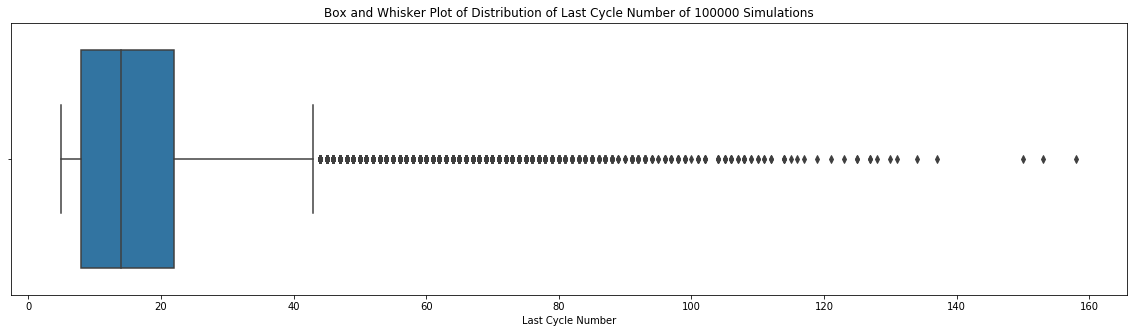

In [4]:
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
boxplot = sns.boxplot(experiment_runs)
plt.title('Plot of Distribution of Last Cycle Number of 100000 Simulations')
plt.xlabel('Last Cycle Number')
quartiles = df[0].quantile([.25,.5,.75])
print("")
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of temperatures is: {lowerq}")
print(f"The upper quartile of temperatures is: {upperq}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Text(0.5, 0, 'Last Cycle Number')

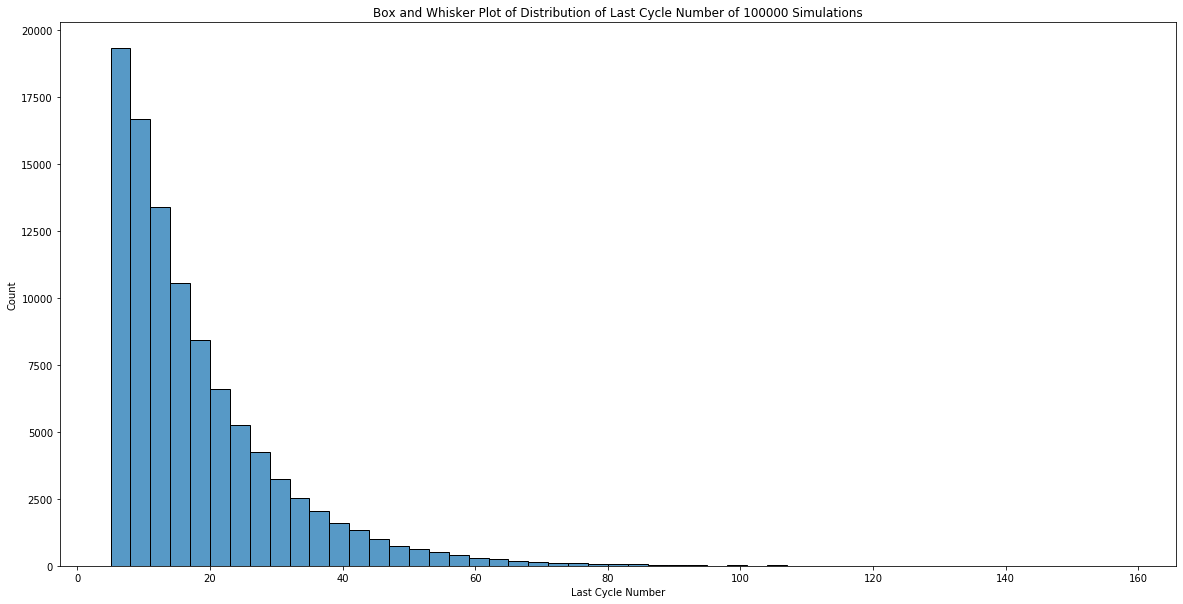

In [5]:
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)
hist = sns.histplot(experiment_runs, binwidth=3)
plt.title('Plot of Distribution of Last Cycle Number of 100000 Simulations')
plt.xlabel('Last Cycle Number')